# <center><font color="navy">**PROJECT UAS DATA MINING GRUP MUHAJIRIN**</font></center>
1. Febri Ramayanti (2006612356) <font color="gray">**- Bagian Preprocessing, Visualisasi, Aktif Berpendapat**</font>
2. Retsya Lapiza (2006612601) <font color="gray">**- Bagian Clasifikasi, Aktif Berpendapat**</font>
3. Nailul Amani (2006612482) <font color="gray">**- Bagian Visualisasi, PPT, Aktif Berpendapat**</font>
4. Yuvani Oksarianti (2006612785) <font color="gray">**- Bagian Clasifikasi, Menggabungkan coding, Aktif Berpendapat**</font>



> Data yang digunakan merupakan Data ***Abalone***, dapat diakses melalui [link text](https://www.kaggle.com/rodolfomendes/abalone-dataset)



### <left><font color="brown">**PREPROCESSING DATA**</font></left>

---

###### ***Load Data*** 

In [ ]:
#impor beberapa modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
sns.set(rc={'figure.figsize':(11.7,8.27)})
from google.colab import files
import warnings; warnings.simplefilter('ignore')

In [ ]:
uploaded = files.upload()

Saving abalone.csv to abalone (1).csv


##### **Mengecek Variabel pada Data**

In [ ]:
# Membaca file ke dalam google colab
# melihat beberapa data di bagian awal
import io
data = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))
data.head()

Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]

In [ ]:
#melihat deksripsi data
data.describe().transpose()

count      mean       std  ...     50%     75%      max
Length          4177.0  0.523992  0.120093  ...  0.5450   0.615   0.8150
Diameter        4177.0  0.407881  0.099240  ...  0.4250   0.480   0.6500
Height          4177.0  0.139516  0.041827  ...  0.1400   0.165   1.1300
Whole weight    4177.0  0.828742  0.490389  ...  0.7995   1.153   2.8255
Shucked weight  4177.0  0.359367  0.221963  ...  0.3360   0.502   1.4880
Viscera weight  4177.0  0.180594  0.109614  ...  0.1710   0.253   0.7600
Shell weight    4177.0  0.238831  0.139203  ...  0.2340   0.329   1.0050
Rings           4177.0  9.933684  3.224169  ...  9.0000  11.000  29.0000

[8 rows x 8 columns]

##### **Mengecek Tipe Variabel pada Data**

In [ ]:
#melihat tipe variabel data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
#mengganti type data sex menjadi kategori
data['Sex'] = data['Sex'].astype('category')

In [ ]:
#mengecek kembali type data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB


In [ ]:
# Menampilkan 8 sampel data Abalone
data.sample(8).transpose()

3381    1396    2813   4009    3117    1880    3360    2503
Sex                  M       M       I      M       F       I       F       I
Length           0.545   0.645   0.255   0.61    0.47    0.55    0.58     0.3
Diameter         0.435    0.51   0.195   0.49    0.36   0.435    0.44    0.23
Height           0.165    0.16   0.055   0.16     0.1    0.14   0.175   0.075
Whole weight    0.9955  1.1835  0.0725  1.146  0.4705  0.7995   1.073   0.127
Shucked weight  0.3245   0.556  0.0285  0.597  0.1635   0.295  0.4005   0.052
Viscera weight  0.2665  0.2385   0.017  0.246   0.089  0.1905  0.2345    0.03
Shell weight     0.325   0.345   0.021  0.265  0.1385   0.238   0.335  0.0345
Rings               19      11       4      8       8      10      19       6

##### ***Check Missing Value***

In [ ]:
#Mengecek missing value
total = data.isnull().sum()
total

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
#melihat beberapa objek data dibagian atas atau awal
data.head()

Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]

In [ ]:
#melihat beberapa objek data dibagian akhir
data.tail()

Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
4172   F   0.565     0.450  ...          0.2390        0.2490     11
4173   M   0.590     0.440  ...          0.2145        0.2605     10
4174   M   0.600     0.475  ...          0.2875        0.3080      9
4175   F   0.625     0.485  ...          0.2610        0.2960     10
4176   M   0.710     0.555  ...          0.3765        0.4950     12

[5 rows x 9 columns]

##### ***Check Duplicate Data***

In [ ]:
#mengecek duplikat data
print(data.shape)
data.duplicated().sum()

(4177, 9)


0

##### ***Check Correlation***

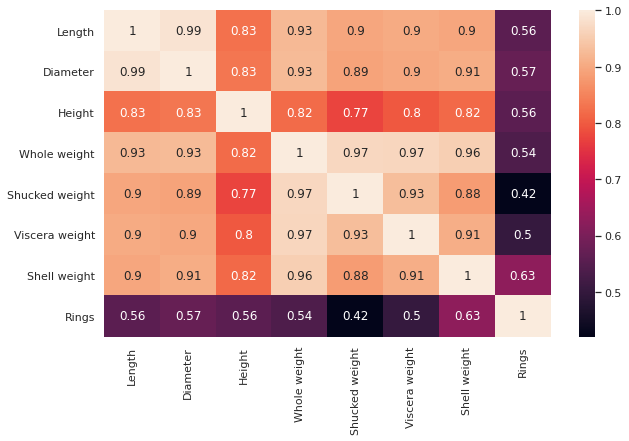

In [ ]:
#melihat korelasi 
corr=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

Korelasi yang terbentuk antar karakteristik kerang dengan karakteristik lainnya dapat dikatakan kuat, kecuali dengan variabel usia. Usia kerang berkorelasi cukup kuat dengan variabel panjang cangkang (length) dan diameter cangkang. Shucked weight (berat daging) memiliki korelasi paling kecil dengan variabel Height diantara variabel lainnya dan korelasi terendah dengan variabel usia.

##### ***Memeriksa outlier***

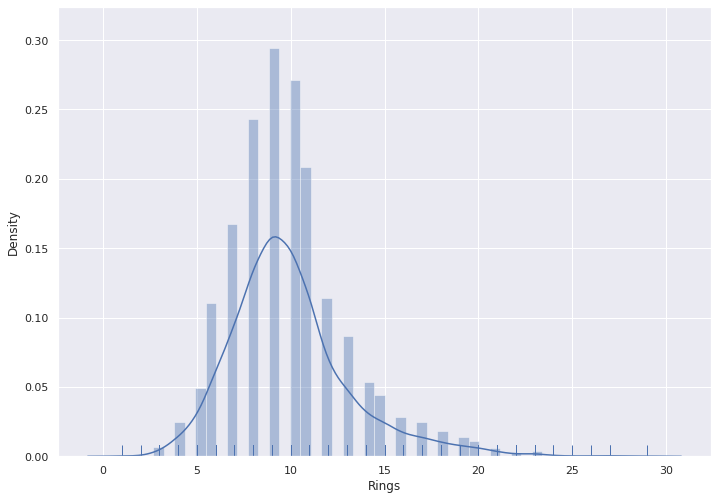

In [ ]:
#Plot distribusi data
p = sns.distplot(data['Rings'], kde=True, rug=True)

Z-score adalah untuk mendeskripsikan suatu titik data dengan menemukan hubungannya dengan Standar Deviasi dan Mean dari kelompok titik data tersebut. Z-score digunakan untuk menemukan outlier pada data.

In [ ]:
#z-score 
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['Rings']))
print(z)

[1.57154357 0.91001299 0.28962385 ... 0.28962385 0.02057072 0.64095986]


In [ ]:
#daftar outlier pada data 
threshold = 3
print(np.where(z > 3))

(array([   6,   72,   83,  166,  167,  181,  232,  270,  275,  278,  294,
        310,  313,  314,  351,  355,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  530,  572,  628,  673,  674,  675,
        678,  744,  754,  756,  811, 2108, 2176, 2180, 2199, 2201, 2209,
       2275, 2305, 2334, 2335, 2344, 2358, 2436, 2459, 2471, 3140, 3149,
       3151, 3193, 3280, 3359, 3924, 3930, 3944]),)


In [ ]:
#Data tanpa outliers
df = np.abs(data.Rings - data.Rings.mean())<=(2*data.Rings.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()
data1 = data[df] 
print(data1.shape, data.shape)

(4177,)
(3966, 9) (4177, 9)


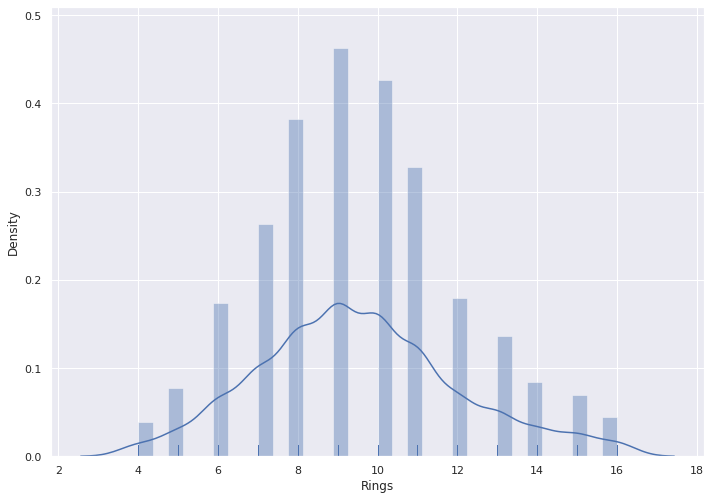

In [ ]:
#distribusi data tanpa outlier
p = sns.distplot(data1['Rings'], kde=True, rug=True)

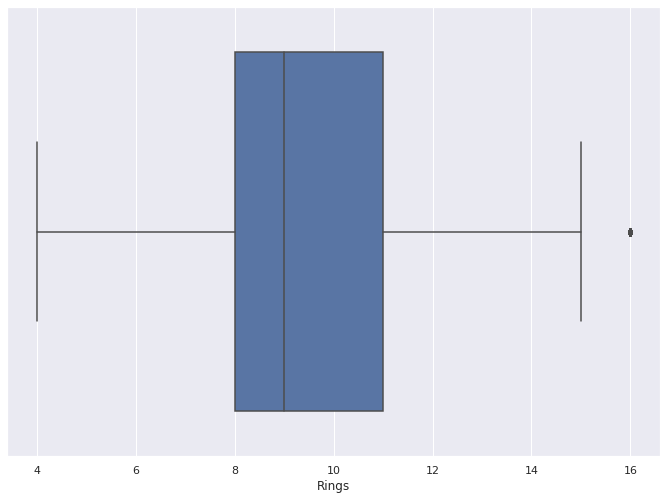

In [ ]:
#boxplot data rings tanp outlier
import seaborn as sns
sns.boxplot(x=data1['Rings'])

In [ ]:
#melihat beberapa data numerik di bagian awal atau atas setelah outlier dihilangkan
data_num = data1.select_dtypes(include = ['float64', 'int64'])
data_num.head()

Length  Diameter  Height  ...  Viscera weight  Shell weight  Rings
0   0.455     0.365   0.095  ...          0.1010         0.150     15
1   0.350     0.265   0.090  ...          0.0485         0.070      7
2   0.530     0.420   0.135  ...          0.1415         0.210      9
3   0.440     0.365   0.125  ...          0.1140         0.155     10
4   0.330     0.255   0.080  ...          0.0395         0.055      7

[5 rows x 8 columns]

In [ ]:
#melihat data kategori di bagian awal atau atas setelah outlier dihilangkan
data_cat = data1.select_dtypes(include = ['category'])
data_cat.head()

Sex
0   M
1   M
2   F
3   M
4   I

In [ ]:
#melihat seluruh variabel data di bagian awal atau atas setelah outlier dihilangkan
data1.head()

Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]

In [ ]:
#deskripsi data tanpa outlier
data1.describe()

Length     Diameter  ...  Shell weight        Rings
count  3966.000000  3966.000000  ...   3966.000000  3966.000000
mean      0.521720     0.405751  ...      0.231895     9.520928
std       0.118765     0.098043  ...      0.133049     2.512303
min       0.130000     0.095000  ...      0.003500     4.000000
25%       0.450000     0.345000  ...      0.125000     8.000000
50%       0.540000     0.420000  ...      0.225000     9.000000
75%       0.610000     0.480000  ...      0.320000    11.000000
max       0.815000     0.650000  ...      0.815000    16.000000

[8 rows x 8 columns]

In [ ]:
data1['Age'] = data1['Rings']+1.5

In [ ]:
data1['Age Category']=pd.cut(data1['Age'],bins=[0.0,9,11,18],labels=["0","1","2"])

In [ ]:
data1['Age Category'].value_counts()

2    1887
1    1257
0     822
Name: Age Category, dtype: int64

In [ ]:
# Saving the preprocessed Data for future use/analysis
data1.to_csv("data1_PreProcessed.csv", encoding='utf8')

In [ ]:
from google.colab import files
files.download("data1_PreProcessed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### <left><font color="brown">**VISUALISASI DATA**</font></left>

---

In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from collections import Counter
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [ ]:
data = pd.read_csv('data1_PreProcessed.csv')

In [ ]:
#mengambil satu sampel secara acak dari data
data1.sample()

Sex  Length  Diameter  Height  ...  Shell weight  Rings   Age  Age Category
422   F    0.49      0.39   0.135  ...           0.2     13  14.5             2

[1 rows x 11 columns]

##### **Standarisasi pada Data**
Terdapat perbedaan satuan antar variabel pada data abalone. Oleh karena itu, akan dilakukan standardisasi pada data

In [ ]:
# standarisasi 
import sklearn
from sklearn import preprocessing as per

In [ ]:
# memilih data numerik saja untuk di standarisasi
data_num = data1.select_dtypes(include = ['float64', 'int64'])
scaler=per.MinMaxScaler(feature_range=(0,1))
rescaleData=scaler.fit_transform(data_num)
rescaleData=pd.DataFrame(rescaleData,index=data_num.index,columns=data_num.columns)
print(rescaleData)

        Length  Diameter    Height  ...  Shell weight     Rings       Age
0     0.474453  0.486486  0.084071  ...      0.180530  0.916667  0.916667
1     0.321168  0.306306  0.079646  ...      0.081947  0.250000  0.250000
2     0.583942  0.585586  0.119469  ...      0.254467  0.416667  0.416667
3     0.452555  0.486486  0.110619  ...      0.186691  0.500000  0.500000
4     0.291971  0.288288  0.070796  ...      0.063463  0.250000  0.250000
...        ...       ...       ...  ...           ...       ...       ...
4172  0.635036  0.639640  0.146018  ...      0.302526  0.583333  0.583333
4173  0.671533  0.621622  0.119469  ...      0.316697  0.500000  0.500000
4174  0.686131  0.684685  0.181416  ...      0.375231  0.416667  0.416667
4175  0.722628  0.702703  0.132743  ...      0.360444  0.500000  0.500000
4176  0.846715  0.828829  0.172566  ...      0.605669  0.666667  0.666667

[3966 rows x 9 columns]


In [ ]:
#melihat 1 sampel acak dari variabel kategori
data_cat= data1.select_dtypes(include = ['category'])
data_cat.sample()

Sex Age Category
3213   F            2

In [ ]:
# menggabungkan data standardize dan kategori
data2 = pd.concat([rescaleData, data_cat], axis = 1)

In [ ]:
#melihat 1 sampel acak dari data setelah penggabungan
data2.sample()

Length  Diameter    Height  ...       Age  Sex  Age Category
929  0.452555   0.45045  0.115044  ...  0.166667    I             0

[1 rows x 11 columns]

###### **Informasi Dasar Variabel Numerik**

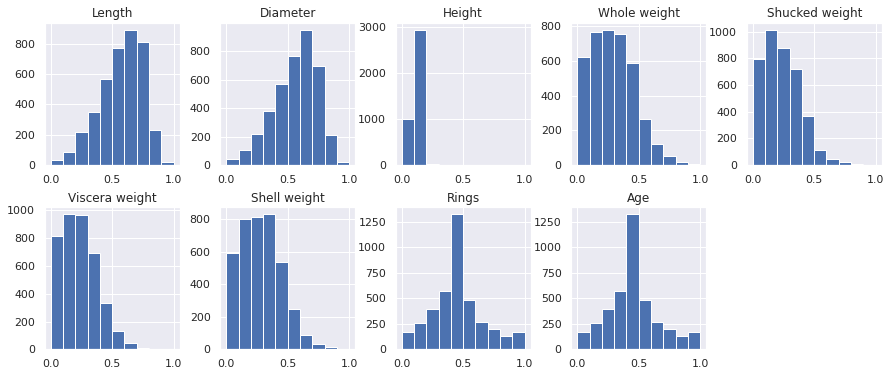

In [ ]:
#melihat distribusi dari variabel numerik
numerical = data2.select_dtypes(include = ['int64','float64']).columns
data2[numerical].hist(figsize=(15, 6), layout=(2,5));

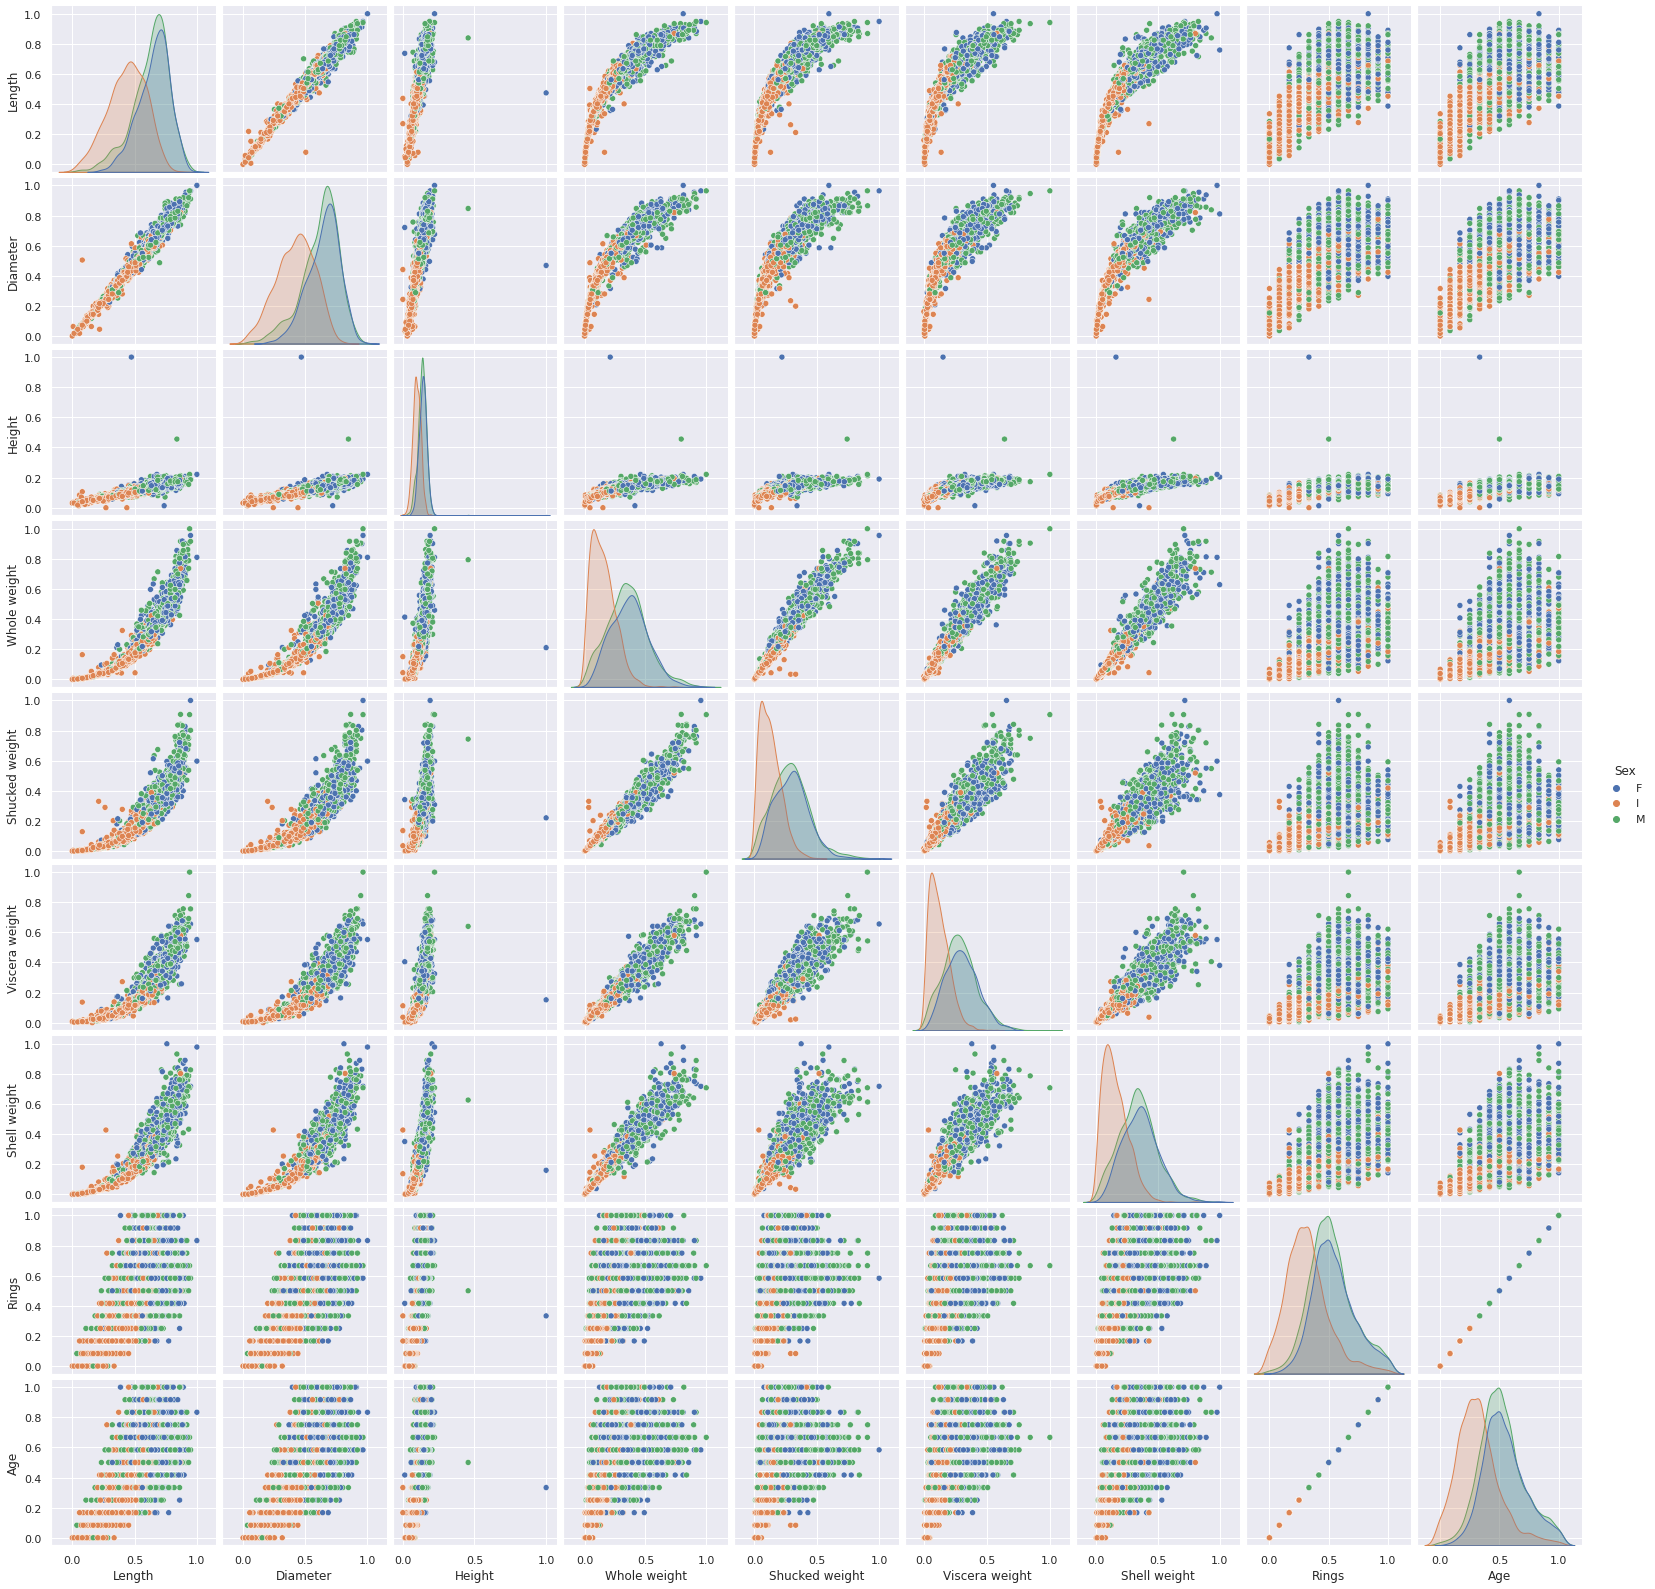

In [ ]:
#visualisasi menggunakan pair plot
sns.pairplot(data2, hue="Sex")

###### **Informasi Dasar Variabel Kategorik**

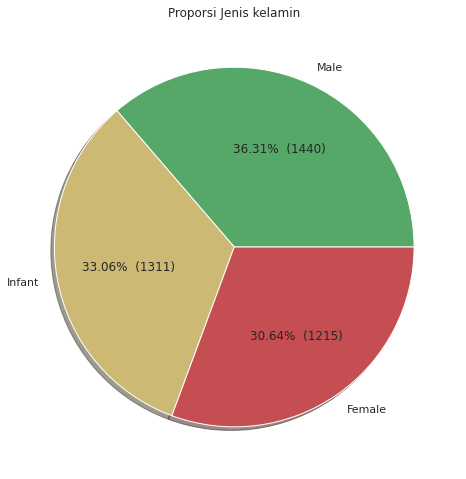

In [ ]:
#visualisasi dengan diagram lingkaran (pie plot)
#proporsi jenis kelamin dari abalone
labelsSex = ["Male", "Infant", "Female"]
valuesSex = data2['Sex'].value_counts().values
colors=['g','y','r']
def make_autopct(valuesSex):
    def my_autopct(pct):
        total = sum(valuesSex)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(valuesSex, colors=colors, labels=labelsSex, autopct=make_autopct(valuesSex), shadow=True)
plt.title('Proporsi Jenis kelamin')
plt.show()

#Jenis Kelamin yg lebih dominan pada data abalone yakni Male dengan proporsi 36.31%

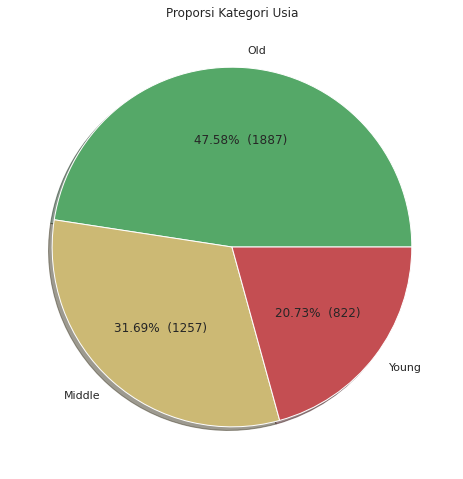

In [ ]:
#proporsi usia dari abalone
labelsAge= ["Old","Middle",'Young']
valuesAge= data2['Age Category'].value_counts().values
colors=['g','y','r']
def make_autopct(valuesAge):
    def my_autopct(pct):
        total = sum(valuesAge)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(valuesAge, colors=colors, labels=labelsAge, autopct=make_autopct(valuesAge), shadow=True)
plt.title('Proporsi Kategori Usia')
plt.show()

#Kategori usia yg lebih dominan pada data abalone yakni berusia tua dengan proporsi 47.58%

##### **Scatterplot**

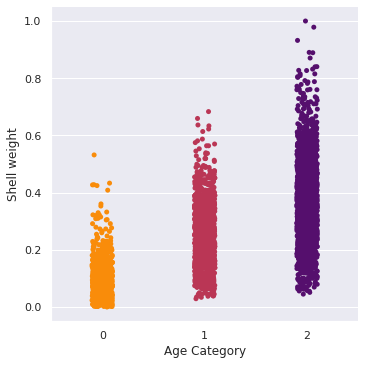

In [ ]:
#scatterplot antara age dan shell weight
sns.catplot(x="Age Category", y="Shell weight", palette="inferno_r", data=data2)
plt.show()

#Berat Cangkang mempengaruhi Kategori Usia Abalone
#Semakin Berat cangkang dari abalone maka usia Abalone semakin tua

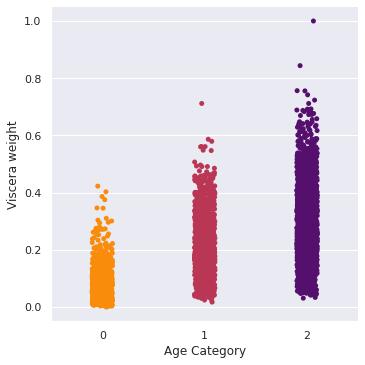

In [ ]:
#scatterplot antara Age dan viscera  weight
sns.catplot(x="Age Category", y="Viscera weight", palette="inferno_r", data=data2)

#Berat Jeroan yang sudah dibersihkan mempengaruhi Kategori Usia Abalone
#Semakin Berat jeroannya maka usia Abalone semakin tua

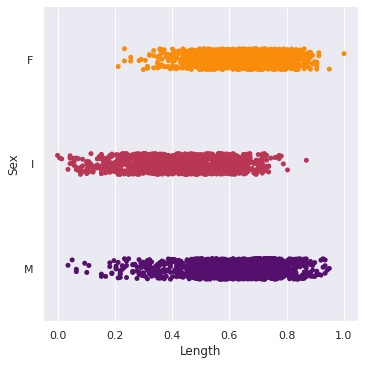

In [ ]:
#scatterplot antara sex dan length
sns.catplot(x="Length", y="Sex", palette="inferno_r", data=data2)

#Ukuran panjang Cangkang dari abalone betina berada di range 0.2 hingga 1.0
#Ukuran panjang Cangkang dari abalone jantan berada di range 0.01 hingga 0.95
#Ukuran panjang Cangkang dari abalone Infant berada di range 0.001 hingga 0.85

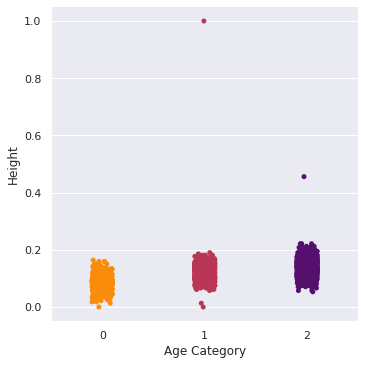

In [ ]:
#scatterplot antara age dan Height
sns.catplot(x="Age Category", y="Height", palette="inferno_r", data=data2)


#ukuran cangkang lebih tinggi pada abalone yang cenderung berada di kategori usia lebih tua

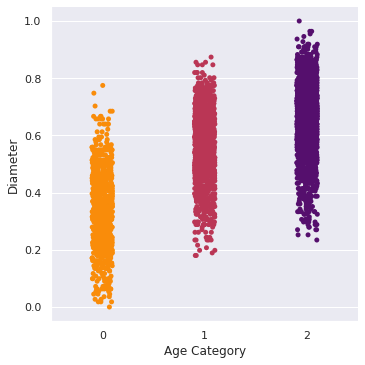

In [ ]:
#scatterplot antara Age dan Diameter
sns.catplot(x="Age Category", y="Diameter", palette="inferno_r", data=data2)

#ukuran diameter pada abalone yang berada di kategori usia lebih tua semakin lebar

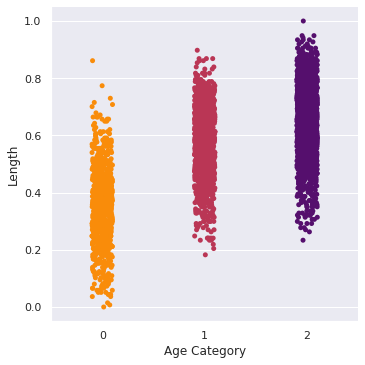

In [ ]:
#scatterplot antara Age dan length
sns.catplot(x="Age Category", y="Length", palette="inferno_r", data=data2)

#semakin tua kategori usia abalone semakin panjang cangkangnya

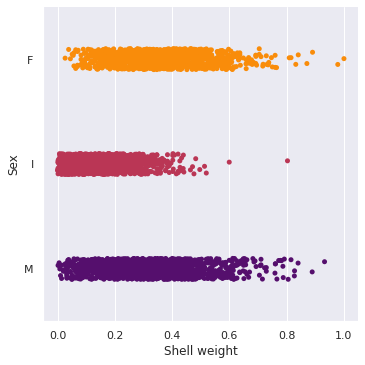

In [ ]:
#scatterplot antara sex dan shell weight
sns.catplot(x="Shell weight", y="Sex", palette="inferno_r", data=data2)
plt.show() 

#berat cangkang berpengaruh pada jenis kelamin abalone
#abalone yang masih bayi atau infant memiliki berat cangkang yang lebih ringan

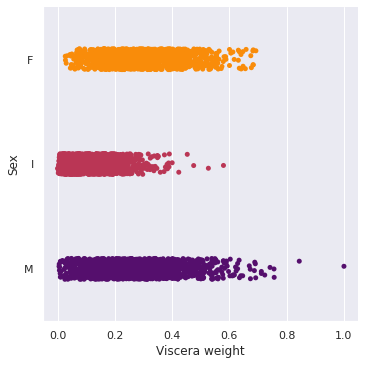

In [ ]:
#scatterplot antara sex dan Viscera weight
sns.catplot(x="Viscera weight", y="Sex", palette="inferno_r", data=data2)
plt.show()

#berat jeroan berpengaruh pada jenis kelamin abalone
#abalone jantan cenderung lebih berat dibandingkan dengan abalone betina
#abalone yang masih bayi atau infant memiliki berat jeroan yang lebih ringan

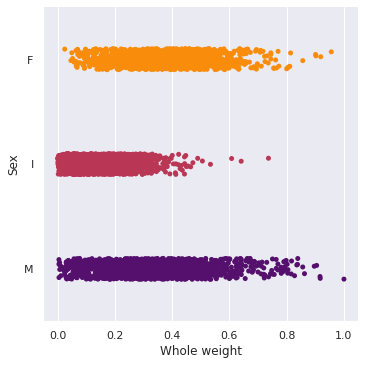

In [ ]:
#scatterplot antara sex dan whole  weight
sns.catplot(x="Whole weight", y="Sex", palette="inferno_r", data=data2)
plt.show()

#berat keseluruhan abalone berpengaruh pada jenis kelamin abalon
#berat keseluruhan pada abalone infant lebih ringan dibandingkan yang dewasa

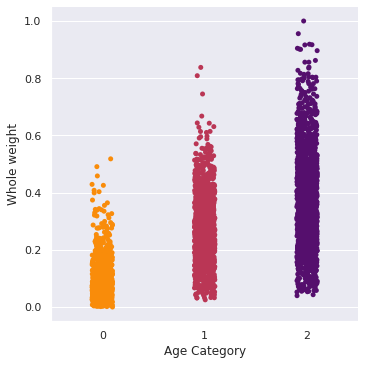

In [ ]:
#scatterplot antara Age dan whole  weight
sns.catplot(x="Age Category", y="Whole weight", palette="inferno_r", data=data2)


#berat keseluruhan abalone berpengaruh pada kategori usia abalone
#semakin berat abalone maka semakin tua usianya

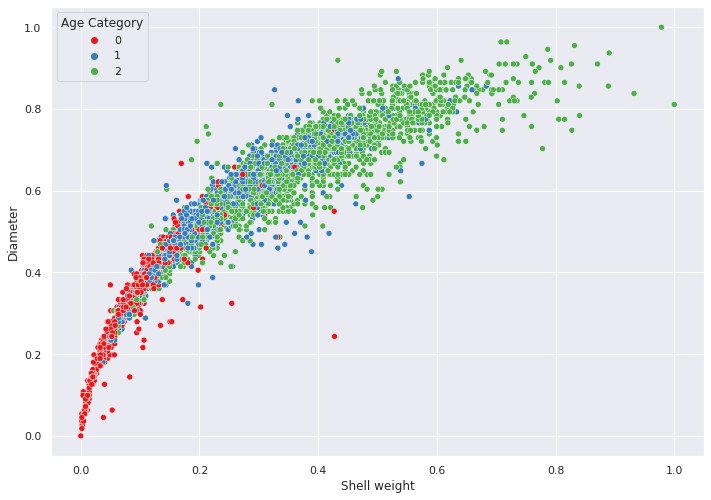

In [ ]:
sc1 = sns.scatterplot(x=data2['Shell weight'], y=data2['Diameter'], hue = data2['Age Category'], palette="Set1")
# didapat insight: untuk Age Category 0 (Young) cenderung memiliki berat cangkang 0 - 0,2 
# didapat insight: untuk Age Category 0 (Young) cenderung memiliki diameter 0 - 0,4 

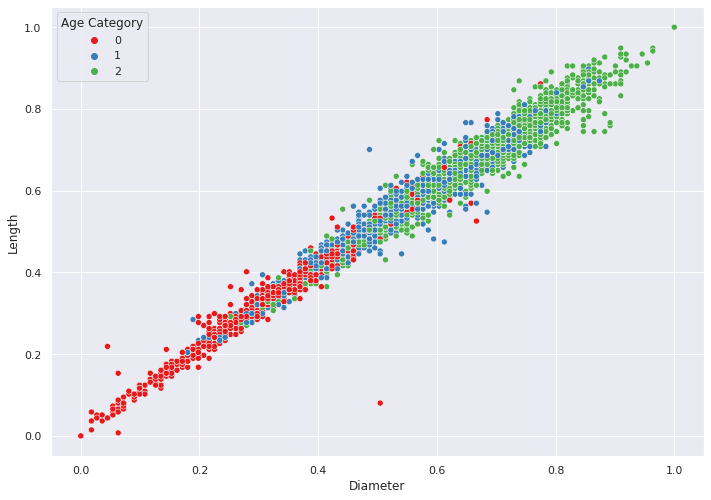

In [ ]:
sc2 = sns.scatterplot(x=data2['Diameter'], y=data2['Length'], hue = data2['Age Category'], palette="Set1") 
# didapat insight: untuk Age Category 0 (Young) cenderung memiliki Diameter 0 - 0,4 cm
# didapat insight: untuk Age Category 0 (Young) cenderung memiliki Length 0 - < 0,4 cm
# didapat insight: untuk Age Category 1 (Middle) cenderung memiliki Length > 0.4 - 0,8 cm, begitu pula Diameternya
# didapat insight: untuk Age Category 1 (Middle) cenderung memiliki Length 0.5 - 1 cm, begitu pula Diameternya

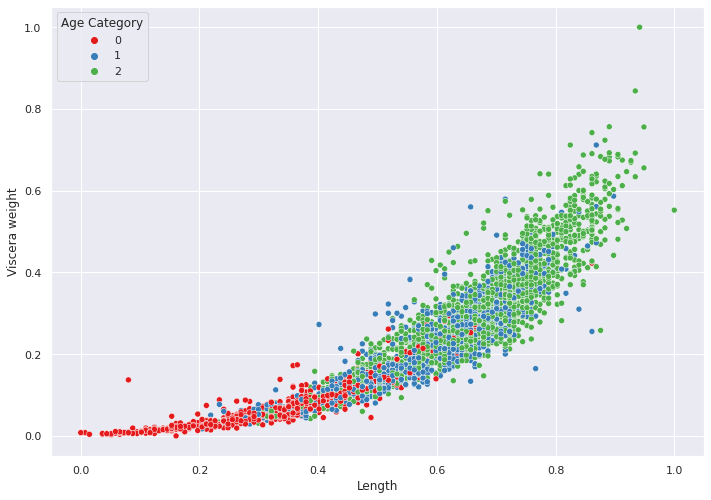

In [ ]:
sc3 = sns.scatterplot(x=data2['Length'], y=data2['Viscera weight'], hue = data2['Age Category'], palette="Set1")
# didapat insight: untuk Age Category 0 (Young) cenderung memiliki panjang ukuran cangkang 0 - 0,4 cm
# didapat insight: untuk Age Category 0 (Young) cenderung memiliki berat jeroan 0 - 0,2

##### **BarPlot**


In [ ]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

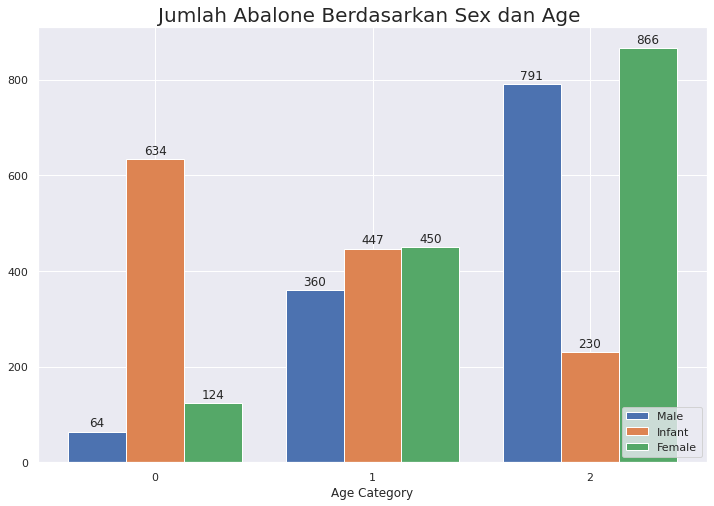

In [ ]:
# Melihat Jumlah Abalon Berdasarkan Sex dan Age
counts1 = data2.groupby(["Age Category", "Sex"]).size().unstack() 
plt.figure(figsize=(12,8)) 
plt.xlabel('Age Category') 
groupedbarplot(counts1) 
plt.title("Jumlah Abalone Berdasarkan Sex dan Age ", fontsize=20) 
plt.legend(['Male ', 'Infant','Female'], loc='lower right') 
plt.show()
# Pada kategori Usia 0  (Young), Didominasi  oleh kerang abalon yang belum memiliki jenis kelamin (Infant)
# pada kategori 1 (Medium), Didominasi oleh kerang abalon yang berjenis kelamin Female dan belum memiliki jenis kelamin. 
# pada kategori 2 (Old), didominasi oleh kerang abalon yang berjenis kelamin Female diikuti oleh yang berjenis kelamin Male. 

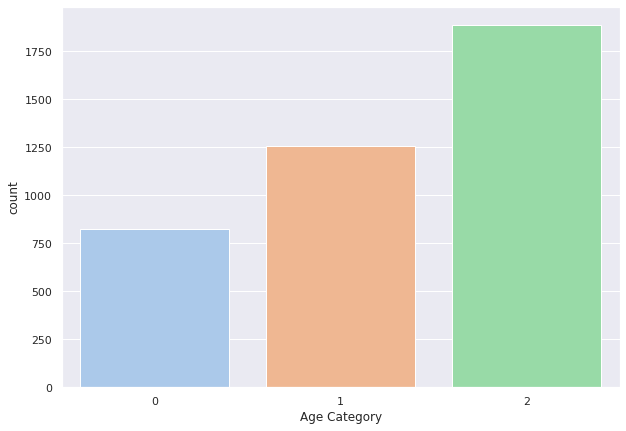

In [ ]:
#melihat jumlah abalone berdasarkan usia
plt.figure(figsize = (10,7))
sns.countplot(data2['Age Category'], palette = 'pastel')
plt.show()

#abalone dengan usia lebih tua cenderung lebih banyak dibandingkan abalone yang masih muda

Dari grafik diatas kita dapat melihat bahwa kategori umur untuk abalone terletak dari muda, pertengahan sampai tua semakin banyak, ternyata umur untuk abalone paling banyak ialah abalone dengan kategori umur ke-2 yang berarti abalone yang memiliki umur tua (old). 

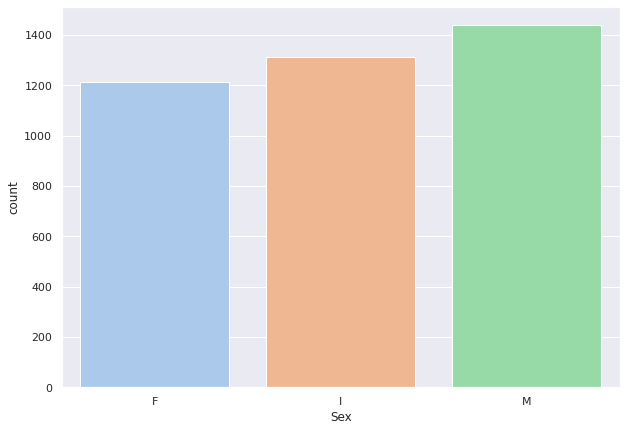

In [ ]:
#melihat jumlah abalone berdasarkan jenis kelaminnya
plt.figure(figsize = (10,7))
plt.xlabel('Age Category')
sns.countplot(data2['Sex'], palette = 'pastel')
plt.show()

Dari grafik diatas dapat dilihat bahwa jumlah abalone berdasarkan jenis kelaminnya hampir sama, namun lebih didominasi oleh abalone jantan dengan jumlah total lebih dari 1400 abalone .

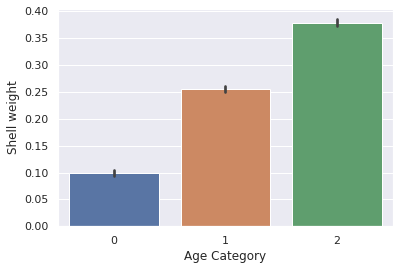

In [ ]:
# BarPlot Usia kerang terhadap berat cangkang
p = sns.barplot(y = "Shell weight", x = "Age Category", data = data2);
# Semakin Berat Cangkang (Shell weight) abalon, maka semakin tinggi pula umurnya

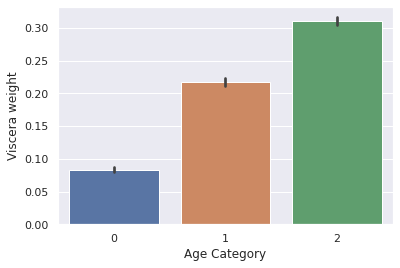

In [ ]:
# BarPlot Usia kerang terhadap berat jeroan
p = sns.barplot(y = "Viscera weight", x = "Age Category", data = data2);
# Semakin Berat Jeroan (Viscera weight) abalon, maka tinggi pula umurnya

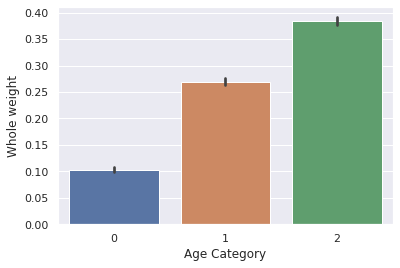

In [ ]:
# BarPlot Usia kerang terhadap berat keseluruhan
p = sns.barplot(y = "Whole weight", x = "Age Category", data = data2);
# Semakin Berat Kerang (Whole weight) abalon, maka tinggi pula umurnya

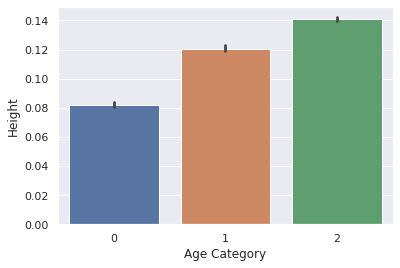

In [ ]:
# BarPlot Usia kerang terhadap tinggi cangkang
p = sns.barplot(y = "Height", x = "Age Category", data = data2);
# Semakin tinggi cangkang (Height) abalon, maka tinggi pula umurnya

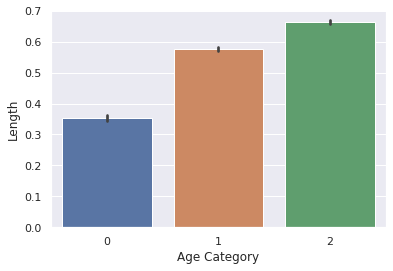

In [ ]:
# BarPlot Usia kerang terhadap panjang ukuran cangkang
p = sns.barplot(y = "Length", x = "Age Category", data = data2);
# Semakin panjang ukuran kerang(Length) abalon  maka tinggi pula umurnya

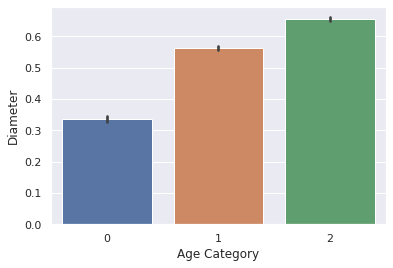

In [ ]:
# BarPlot Usia kerang terhadap diameter cangkang
p = sns.barplot(y = "Diameter", x = "Age Category", data = data2);
# Semakin besar diameter kerang  abalon, maka tinggi pula umurnya

### <left><font color="brown">**CLASSIFICATION**</font></left>

---

##### **Membagi data train dan data test**

In [ ]:
#melihat kembali informasi dari data 
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3966 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             3966 non-null   category
 1   Length          3966 non-null   float64 
 2   Diameter        3966 non-null   float64 
 3   Height          3966 non-null   float64 
 4   Whole weight    3966 non-null   float64 
 5   Shucked weight  3966 non-null   float64 
 6   Viscera weight  3966 non-null   float64 
 7   Shell weight    3966 non-null   float64 
 8   Rings           3966 non-null   int64   
 9   Age             3966 non-null   float64 
 10  Age Category    3966 non-null   category
dtypes: category(2), float64(8), int64(1)
memory usage: 317.8 KB


In [ ]:
#mencek deskripsi data
data1.describe().transpose()

count       mean       std  ...      50%        75%      max
Length          3966.0   0.521720  0.118765  ...   0.5400   0.610000   0.8150
Diameter        3966.0   0.405751  0.098043  ...   0.4200   0.480000   0.6500
Height          3966.0   0.138263  0.041289  ...   0.1400   0.165000   1.1300
Whole weight    3966.0   0.812643  0.482972  ...   0.7775   1.135875   2.7795
Shucked weight  3966.0   0.356264  0.222356  ...   0.3300   0.498500   1.4880
Viscera weight  3966.0   0.177995  0.108868  ...   0.1665   0.248875   0.7600
Shell weight    3966.0   0.231895  0.133049  ...   0.2250   0.320000   0.8150
Rings           3966.0   9.520928  2.512303  ...   9.0000  11.000000  16.0000
Age             3966.0  11.020928  2.512303  ...  10.5000  12.500000  17.5000

[9 rows x 8 columns]

In [ ]:
data1.drop('Sex', axis = 1, inplace = True)

In [ ]:
data1.drop('Age', axis = 1, inplace = True)

In [ ]:
data1.drop('Rings', axis = 1, inplace = True)

In [ ]:
data1.head()

Length  Diameter  Height  ...  Viscera weight  Shell weight  Age Category
0   0.455     0.365   0.095  ...          0.1010         0.150             2
1   0.350     0.265   0.090  ...          0.0485         0.070             0
2   0.530     0.420   0.135  ...          0.1415         0.210             1
3   0.440     0.365   0.125  ...          0.1140         0.155             2
4   0.330     0.255   0.080  ...          0.0395         0.055             0

[5 rows x 8 columns]

In [ ]:
X = data1.drop(['Age Category'], axis = 1)
y = data1['Age Category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
y_test.head()

3727    0
3530    0
1921    2
3087    0
824     0
Name: Age Category, dtype: category
Categories (3, object): ['0' < '1' < '2']

In [ ]:
y_train = y_train.astype('int')

In [ ]:
y_test = y_test.astype('int')

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3172, 7) (794, 7) (3172,) (794,)


In [ ]:
X_train.head()

Length  Diameter  Height  ...  Shucked weight  Viscera weight  Shell weight
1594   0.525     0.400   0.140  ...          0.3050          0.1600         0.169
694    0.165     0.110   0.020  ...          0.0065          0.0025         0.005
3008   0.750     0.615   0.205  ...          0.8210          0.4230         0.726
3364   0.330     0.245   0.085  ...          0.0655          0.0365         0.055
2100   0.370     0.290   0.100  ...          0.1025          0.0505         0.085

[5 rows x 7 columns]

##### **Import modul akurasi**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##### **k-Nearest Neighbour**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Hitung error untuk K values between 250 sampai 300
for i in range(50,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

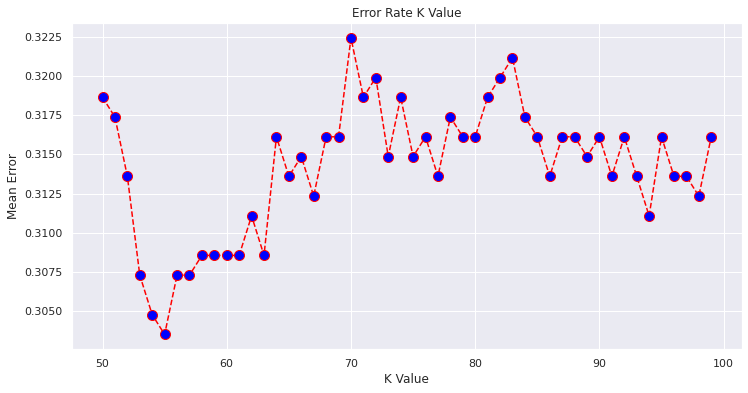

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(50,100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Menentukan nilai K dilihat dari error yang paling kecil, hasilnya k = 59 merupakan nilai k yang optimal

In [ ]:
#cara lain menentukan k dengan melihat plot accurancy yang terbesar dari k-Nearest Neighbour
scores = []

for n in range(2, 150):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

Text(0.5, 0, 'K nearest neighbors')

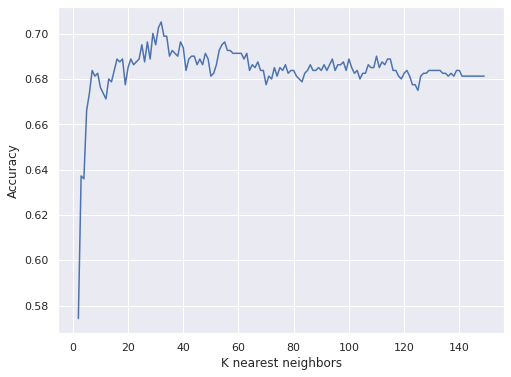

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 150), scores)
plt.ylabel("Accuracy")
plt.xlabel("K nearest neighbors")

Menentukan k dengan melihat plot accurancy yang terbesar dari k-Nearest Neighbour, hasilnya k=36 yang paling optimal 

In [ ]:
#klasifikasi k-nearest neighbour dengan k=59
from mlxtend.plotting import plot_decision_regions

clf = KNeighborsClassifier(n_neighbors = 59)
clf.fit(X_train, y_train)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  0.6914357682619647
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       143
           1       0.61      0.47      0.53       262
           2       0.76      0.80      0.78       389

    accuracy                           0.69       794
   macro avg       0.67      0.69      0.67       794
weighted avg       0.69      0.69      0.68       794



In [ ]:
#klasifikasi k-nearest neighbour dengan k=36
from mlxtend.plotting import plot_decision_regions

clf = KNeighborsClassifier(n_neighbors = 36)
clf.fit(X_train, y_train)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  0.6926952141057935
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       143
           1       0.59      0.50      0.54       262
           2       0.77      0.78      0.77       389

    accuracy                           0.69       794
   macro avg       0.67      0.70      0.68       794
weighted avg       0.69      0.69      0.69       794



Dari kedua nilai k tersebut, didapatkan nilai accuracy 71.91% untuk nilai k=59. Dan accuracy 71.78% untuk nilai k=36

##### **Cross Validation K-NN** 


In [ ]:
#cross validation k-nn
from sklearn.model_selection import cross_val_score
import time
mulai = time.time()
scores_knn = cross_val_score(knn, X, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy knn: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_knn.mean(), scores_knn.std() * 2, waktu))
print(scores_knn)

Accuracy knn: 0.68 (+/- 0.06), Waktu = 0.394 detik
[0.65743073 0.68010076 0.65239295 0.69017632 0.69269521 0.67002519
 0.73232323 0.62373737 0.71969697 0.68686869]


Hasil Cross Validation dari metode K-NN didapatkan nilai accuracy hanya sebesar 68.00%

##### **Gaussian Naive Bayes Classifier**#

In [ ]:
#klasifikasi menggunakan metode Naive Bayes Classifer
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nbc = gnb.fit(X_train, y_train)
y_pred = nbc.predict(X_test)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  0.5906801007556675
              precision    recall  f1-score   support

           0       0.53      0.86      0.66       143
           1       0.45      0.38      0.41       262
           2       0.72      0.63      0.68       389

    accuracy                           0.59       794
   macro avg       0.57      0.62      0.58       794
weighted avg       0.60      0.59      0.58       794



Ketika menggunakan metode Gaussian Naive Bayes Classifier, klasifikasi yang didapat hanya dengan accuracy = 61.46%

##### **Regresi Logistik**#

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#klasifikasi menggunakan metode regresi logistik
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
LogisticRegression()
y_reglog = clf.predict(X_test)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  0.5906801007556675
              precision    recall  f1-score   support

           0       0.53      0.86      0.66       143
           1       0.45      0.38      0.41       262
           2       0.72      0.63      0.68       389

    accuracy                           0.59       794
   macro avg       0.57      0.62      0.58       794
weighted avg       0.60      0.59      0.58       794



Ketika menggunakan metode regresi logistik, Accuracy klasifikasi  diperoleh sebesar 61.46%

##### **Decision Tree**

Akurasi =  0.6473551637279596
[[ 96  35  12]
 [ 34 121 107]
 [ 17  75 297]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       143
           1       0.52      0.46      0.49       262
           2       0.71      0.76      0.74       389

    accuracy                           0.65       794
   macro avg       0.63      0.63      0.63       794
weighted avg       0.64      0.65      0.64       794



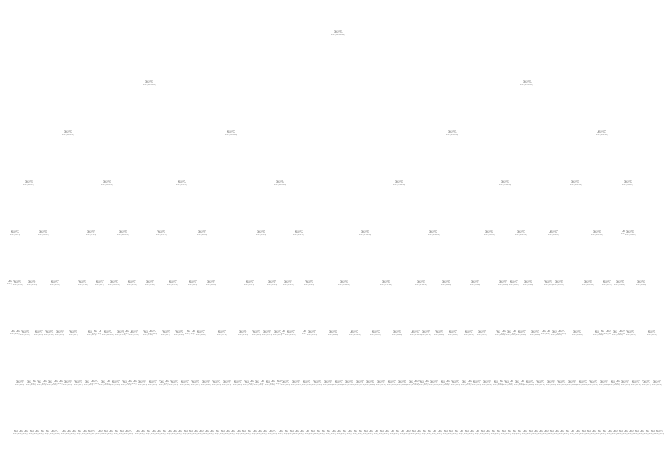

In [ ]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
DT = tree.DecisionTreeClassifier(max_depth = 8)
DT = DT.fit(X_train, y_train)
y_DT = DT.predict(X_test)
print('Akurasi = ', accuracy_score(y_test, y_DT))
print(confusion_matrix(y_test, y_DT))
print(classification_report(y_test, y_DT))

tree.plot_tree(DT) 
plt.show()

Ketika menggunakan metode decision tree, klasifikasi hanya dengan accuracy = 65.61%

##### **Random Forest Classifier**

In [ ]:
#perhitungan error max depth
error = []

# Hitung error max depth dari 1 sampai 7 
# Max depth > 7 overfitting
for i in range(1, 10):
   DT = tree.DecisionTreeClassifier(max_depth = i)
   DT = DT.fit(X_train, y_train)
   pred_i = DT.predict(X_test)
   error.append(np.mean(pred_i != y_test))

In [ ]:
error =np.array(error)
print(error)

[0.39672544 0.39042821 0.37783375 0.34634761 0.33627204 0.34005038
 0.34634761 0.35264484 0.34508816]


Text(0, 0.5, 'Mean Error')

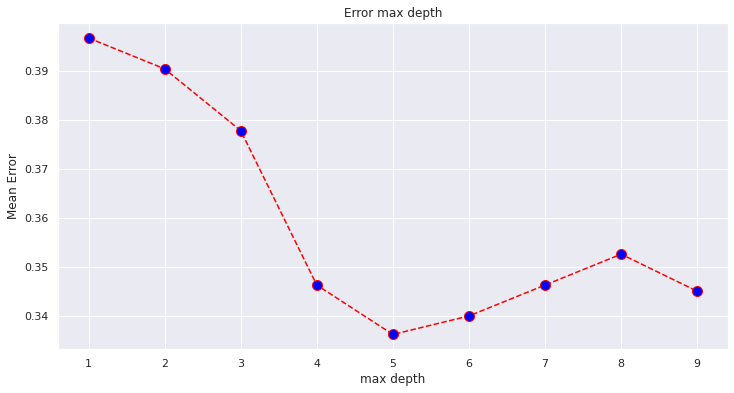

In [ ]:
#plot max depth
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error max depth')
plt.xlabel('max depth')
plt.ylabel('Mean Error')

Berdasarkan error max depth yang didapat, random forest dengan kedalaman 7 memiliki mean error terkecil sehingga klasifikasi dengan metode random forest classifier yang digunakan max depth = 7

In [ ]:
#berdasarkan plot dari perhitungan error max depth,  maka kita menggunakan max dept = 7
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 7)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6914357682619647

ketika menggunakan metode random forest classifier, didapat accuracy = 72.04%. accuracy ini lebih tinggi dari metode lainnya.


Feature ranking:
1. feature 6 (0.281179)
2. feature 2 (0.159698)
3. feature 3 (0.152312)
4. feature 1 (0.129895)
5. feature 5 (0.119175)
6. feature 0 (0.079739)
7. feature 4 (0.078003)


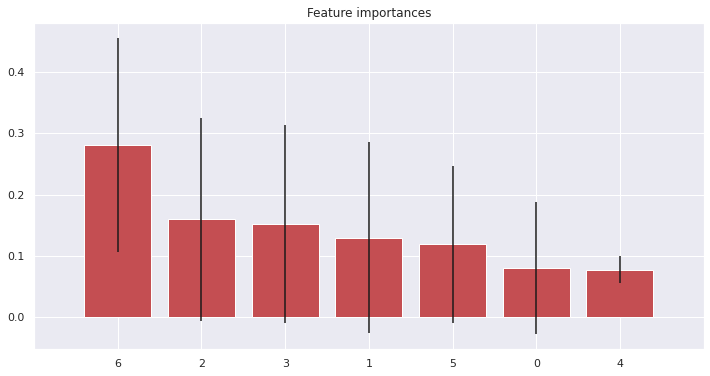

In [ ]:
# Variable importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
#melihat hasil klasifikasi
from sklearn.tree import export_graphviz
# Export as dot file
estimator = rf.estimators_[5]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = (['Shell weight','Height','Viscera weight','Diameter','Whole weight','Length','Shucked weight']),
                class_names = (['1','2','3']),
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')


##### **Support Vector Machine**

In [ ]:
#klasifikasi metode Support Vector Machine
from sklearn.svm import SVC

svc=SVC()
y_pred = svc.fit(X_train, y_train).predict(X_test)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  0.6775818639798489
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       143
           1       0.57      0.47      0.51       262
           2       0.75      0.78      0.76       389

    accuracy                           0.68       794
   macro avg       0.65      0.68      0.66       794
weighted avg       0.67      0.68      0.67       794



ketika menggunakan metode SVM, klasifikasi hanya dengan accuracy = 68.26%

##### **Artificial Neural Network**

In [ ]:
#klasifikasi metode Artificial Neural Network
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(hidden_layer_sizes=(100,))# 2 layers 30 neurons and 20 neurons
NN.fit(X_train, y_train)
y_NN = NN.predict(X_test)
accuracy_score(y_test, y_NN)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  0.6775818639798489
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       143
           1       0.57      0.47      0.51       262
           2       0.75      0.78      0.76       389

    accuracy                           0.68       794
   macro avg       0.65      0.68      0.66       794
weighted avg       0.67      0.68      0.67       794



ketika menggunakan metode artificial network, klasifikasi hanya dengan accuracy = 68.26%%

##### **Membandingkan nilai akurasi**

In [ ]:
from sklearn.model_selection import cross_val_score

Regresi Logistik [0.6823899371069182, 0.6823899371069182, 0.7066246056782335, 0.6246056782334385]
k-NN [0.6855345911949685, 0.7075471698113207, 0.7097791798107256, 0.6340694006309149]
Naive Bayes [0.6320754716981132, 0.6415094339622641, 0.6025236593059937, 0.580441640378549]
Decision Tree [0.6289308176100629, 0.6761006289308176, 0.6498422712933754, 0.6435331230283912]
Random Forest [0.7075471698113207, 0.7075471698113207, 0.7160883280757098, 0.6561514195583596]
SVM [0.6792452830188679, 0.720125786163522, 0.7129337539432177, 0.6340694006309149]


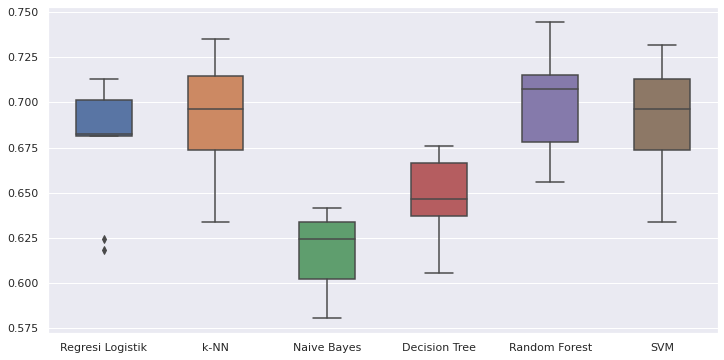

In [ ]:
clf = LogisticRegression(solver='liblinear')
kNN = KNeighborsClassifier(n_neighbors = 59)
gnb = GaussianNB()
dt = tree.DecisionTreeClassifier(max_depth = 8)
rf = RandomForestClassifier(max_depth = 7)
svc = SVC()

Models = [('Regresi Logistik', clf), ('k-NN',kNN), ('Naive Bayes',gnb), ('Decision Tree', dt), ('Random Forest', rf), ('SVM', svc)]
Scores = {}
for model_name, model in Models:
    Scores[model_name] = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

dt = pd.DataFrame.from_dict(Scores)
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=dt, width = 0.5)
for m, s in Scores.items():
    print(m, list(s)[:4])

Dari beberapa metode yang digunakan dilakukan cross validation, hasilnya metode random forest classifier memiliki rentang akurasi yang cukup baik yaitu sebesar accuracy = 72.04%. Accuracy ini lebih tinggi dari metode lainnya. artinya metode ini lebih baik untuk digunakan dalam klasifikasi usia Abalone.

### **SEKIAN, TERIMA KASIH.**